<a href="https://colab.research.google.com/github/carlyle1233/22-2_ML/blob/main/svm_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import svm
from sklearn.datasets import make_blobs

#make_blobs: 모든 방향으로 같은 성질을 가지는 정규분포를 이용해 가상 데이터 생성 
#클러스터링용 가상 데이터를 생성하는데 사용 



**1.  make_blobs Parameter**
*   n_samples, n_features, centers, cluster_std, center_box
*   n_samples: 표본데이터수, default:100
*   n_features: 독립 변수 수, default 20
*   centers: 클러스터 수 혹은 중심, default 3
*   cluster_std: 클러스터 표준편차, default 1
*   center_box: 클러스터 바운딩 박스, default(-10,10)


**2.   반환값** 

*   X:[ n_samples, n_features ]크기의 배열 
*   y: [n_samples] 크기의 배열 


**3. SVM 주요 parameter**


*   C(cost): 어느 정도의 오차를 허용할지에 대한 파라미터 

:default는 1이며, 값이 작을수록 모델이 단순해지고, 값이 커질수록 모델이 복잡해짐.

:로그스케일 단위로 최적치 탐색하는 것이 좋음 
*  kernel: 어떤 커널 함수를 사용할지?
:default: rbf  
ex) linear, sigmoid, rbf, poly

*   degree: 어느 차수까지 다항차수로 분류할지? 커널함수가 poly일 떄 사용됨 
*   gamma: 곡률 경계에 대한 파라미터. rbf, poly, sigmoid 일 때 튜닝하는 값 

:하나의 훈련 샘플에 미치는 영향을 의미하며, 이 값이 작으면 넓은 영역에, 크면 영역이 제한적임. 

*   coef(): 상수값으로써, poly, sigmoid일 때 튜닝 진행 








# **SVM**

: 주어진 데이터가 어느 카테고리에 속할지 판단하는 이진 선형 분류 모델. 

: 데이터 크기가 중간크기 이하, 여러 변수를 기준으로 분류하는 다소 복잡한 과제에 적합한 머신러닝 기법 

**Margin**
: 점들이 포함되지 않은 영역을 최대화해서 카테고리를 분리할 수 있도록 하는 것. 

 즉, Margin은 구분하는 선과 서포트 벡터와의 거리를 의미한다. 또한 이렇게 두 데이터를 구분하는 선을 Decision Boundary라고 한다. 

**Support vector**
: 결정 경계선에 가장 가까이 있는 각 카테고리의 데이터(점)

**Robustness**
양 옆의 서포트 벡터와의 Margin을 최대화하면, Robustness도 최대화가 된다. 
Robust하다는 것은 outlier의 영향을 받지 않는다는 뜻. 

1, 2, 3, 4, 5 이렇게 총 5개 데이터가 있습니다. 이 데이터의 평균은 3입니다. 중앙값도 3입니다.

1, 2, 3, 4, 100으로 데이터가 바뀌었다고 합시다. 5가 100으로 바뀐 것입니다. 이제 평균은 22입니다. 중앙값은 여전히 3입니다. 평균은 100이라는 아웃라이어(outlier)의 영향을 받아서 크게 바뀌었고, 중앙값은 아웃라이어의 영향을 전혀 받지 않아 바뀌지 않았습니다. 이때 평균은 로버스트(robust)하지 않다고 하고, 중앙값은 로버스트(robust)하다고 합니다. 


https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM 

In [ ]:
X,y=make_blobs(n_samples=40, centers=2, random_state=20)

clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

In [ ]:
newData=[[3,4]]
print(clf.predict(newData))

[0]


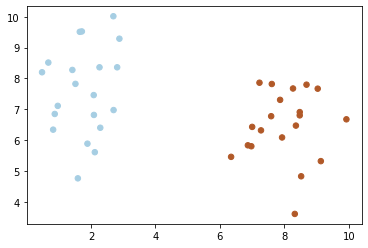

In [ ]:
#샘플 데이터 표현 
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

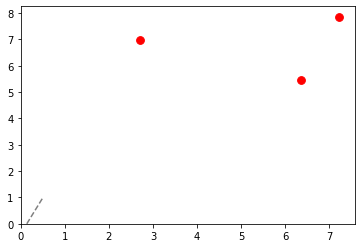

In [ ]:
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0], xlim[1], 30)
yy=np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()


#1. data import and data split 


In [16]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC 
from scipy.stats import randint 
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [17]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv',encoding='utf-8')

In [37]:
data.columns

Index(['Unnamed: 0', 'gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention', 'vote', 'parties'],
      dtype='object')

In [54]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention']]
y=data[['vote']]

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [55]:
X_train.shape

(158, 13)

In [56]:
y_train.shape

(158, 1)

#2. Grid Search

In [57]:
param_grid=[{'kernel': ['rbf'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'kernel':['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10,100]}]

In [58]:
grid_search=GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)


In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             return_train_score=True)

In [65]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score:{:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter:{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-validity Score: 0.696
Test set Score:0.755


In [66]:
result_grid=pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003822,0.001452,0.003079,0.001864,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
1,0.003412,0.000531,0.002097,0.000073,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
2,0.003041,0.000057,0.001997,0.000040,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
3,0.003780,0.001321,0.002413,0.000771,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
4,0.003386,0.000229,0.002225,0.000099,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.6875,0.6875,...,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.004802,0.000611,0.002135,0.000041,100,0.01,linear,"{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}",0.6875,0.6875,...,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931
68,0.004736,0.000656,0.002361,0.000250,100,0.1,linear,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}",0.6875,0.6875,...,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931
69,0.005135,0.000688,0.002195,0.000136,100,1,linear,"{'C': 100, 'gamma': 1, 'kernel': 'linear'}",0.6875,0.6875,...,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931
70,0.005477,0.002054,0.002469,0.000401,100,10,linear,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.6875,0.6875,...,0.690121,0.019626,50,0.698413,0.698413,0.706349,0.692913,0.692913,0.697800,0.004931


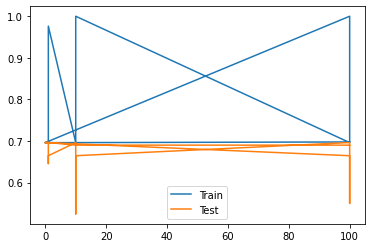

In [67]:
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

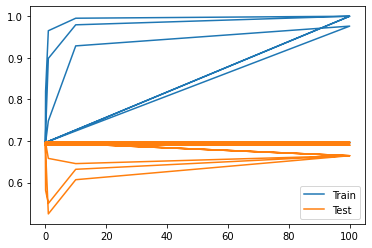

In [68]:
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

#3. Random Search

In [73]:
param_distribs={'kernel': ['rbf'], 
                'C': randint(low=0.001, high=100),
                'gamma': randint(low=0.001, high=100)}

In [74]:
random_search=RandomizedSearchCV(SVC(), param_distributions=param_distribs, 
                                 cv=5, return_train_score=True)


In [75]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6fd543e90>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6fd48a8d0>,
                                        'kernel': ['rbf']},
                   return_train_score=True)

In [76]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score:{:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter:{'C': 95, 'gamma': 88, 'kernel': 'rbf'}
Best Cross-validity Score: 0.665
Test set Score:0.755


In [77]:
result_random=random_search.cv_results_
result_random=pd.DataFrame(result_random)

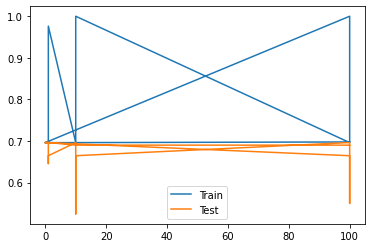

In [78]:
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label='Test')
plt.legend()

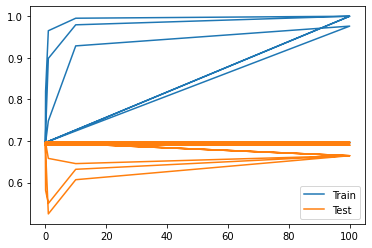

In [79]:
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label='Test')
plt.legend()

#4. 모델평가

In [80]:
svc1=SVC(C=80, gamma=71, kernel='rbf')
svc1.fit(X_train, y_train)

SVC(C=80, gamma=71)

In [81]:
pred_train1=svc1.predict(X_train)

In [83]:
confusion_train1=confusion_matrix(y_train, pred_train1)
print("훈련데이터 오차행렬:\n", confusion_train1)



훈련데이터 오차행렬:
 [[ 48   0]
 [  0 110]]


In [87]:
y_test.shape

(53, 1)

In [88]:
pred_test1.shape

(158,)

In [89]:
X_train.shape

(158, 13)

In [94]:
pred_test1=svc1.predict(X_test)
confusion_test1=confusion_matrix(y_test,pred_test1)
print("테스트 데이터 오차행렬:\n", confusion_test1)

테스트 데이터 오차행렬:
 [[ 0 13]
 [ 0 40]]


In [95]:
f1=f1_score(y_test,pred_test1)
print("f1 score:\n", f1)

f1 score:
 0.8602150537634409


In [97]:
cfreport=classification_report(y_test, pred_test1)
print("분류 예측 리포트:\n", cfreport)

분류 예측 리포트:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.75      1.00      0.86        40

    accuracy                           0.75        53
   macro avg       0.38      0.50      0.43        53
weighted avg       0.57      0.75      0.65        53



#5. 다중분류의 적용 

In [98]:
data.columns

Index(['Unnamed: 0', 'gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention', 'vote', 'parties'],
      dtype='object')

In [108]:
X1=data[['gender_female', 'gender_male', 'region_Chungcheung',
       'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam',
       'edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention']]
y1=data[['parties']]

In [109]:
X_train, X_test, y_train, y_test=train_test_split(X,y1,random_state=42)

In [110]:
parma_grid=[{'kernel':['rbf'], 'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]},
            {'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}]
grid_search=GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [112]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Cross validity Score:{:.3f}".format(grid_search.best_score_))
print("Test set score:{:.3f}".format(grid_search.score(X_test,y_test)))

Best Parameter:{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Best Cross validity Score:0.571
Test set score:0.509


In [113]:
svc2=SVC(C=10, gamma=0.001, kernel='linear')
svc2.fit(X_train, y_train)

SVC(C=10, gamma=0.001, kernel='linear')

In [114]:
pred_train=svc2.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[23  2  3  9]
 [ 3 25  1  8]
 [ 2  1  6 10]
 [ 7  4  2 52]]


In [115]:
pred_test=svc2.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 5  2  1  5]
 [ 2  8  1  5]
 [ 2  0  1  3]
 [ 3  2  0 13]]


In [116]:
f1=f1_score(y_test, pred_test, average='micro')
f2=f1_score(y_test,pred_test,average='macro')
print('macro f1 score:\n',f2)

macro f1 score:
 0.44613997113997117


In [117]:
cfreport=classification_report(y_test, pred_test)
print('분류예측 레포트:\n', cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.42      0.38      0.40        13
           2       0.67      0.50      0.57        16
           3       0.33      0.17      0.22         6
           4       0.50      0.72      0.59        18

    accuracy                           0.51        53
   macro avg       0.48      0.44      0.45        53
weighted avg       0.51      0.51      0.50        53

